In [1]:
!pip install mlflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import mlflow
import mlflow.sklearn

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
!conda create -n mlflowtest python=3.8 -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ASUS\.conda\envs\mlflowtest

  added / updated specs:
    - python=3.8


The following NEW packages will be INSTALLED:

  ca-certificates    pkgs/main/win-64::ca-certificates-2023.12.12-haa95532_0 
  libffi             pkgs/main/win-64::libffi-3.4.4-hd77b12b_0 
  openssl            pkgs/main/win-64::openssl-3.0.13-h2bbff1b_0 
  pip                pkgs/main/win-64::pip-23.3.1-py38haa95532_0 
  python             pkgs/main/win-64::python-3.8.18-h1aa4202_0 
  setuptools         pkgs/main/win-64::setuptools-68.2.2-py38haa95532_0 
  sqlite             pkgs/main/win-64::sqlite-3.41.2-h2bbff1b_0 
  vc                 pkgs/main/win-64::vc-14.2-h21ff451_1 
  vs2015_runtime     pkgs/main/win-64::vs2015_runtime-14.27.29016-h5e58377_2 
  wheel              pkgs/main/win-64::wheel-0.41.2-py38haa95532_0 





Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing trans



==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.2




In [5]:
!conda activate mlflowtest

In [6]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [7]:
from mlflow.models import infer_signature

In [8]:
data=load_iris()

In [9]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [10]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
df['label']=data.target

In [12]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


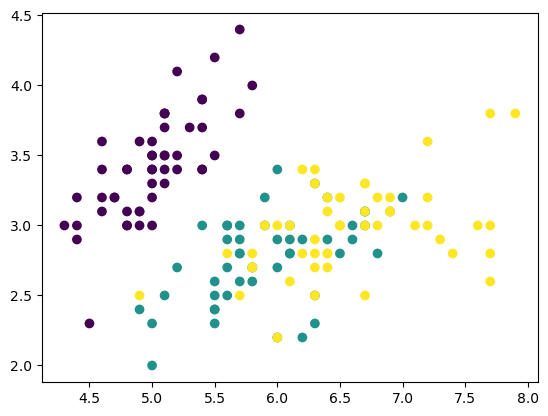

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],c=df['label'])

In [14]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns='label'),df['label'],random_state=42,test_size=0.2)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
l=LogisticRegression()
params={'solver':['liblinear','lbfgs','sag','saga','newton-cg'],'max_iter':[100,1000,1500],'C':[0.0001,0.001,0.01,0.1,0.25,0.5,0.75,1]}
g=GridSearchCV(l,param_grid=params,cv=5,verbose=1,scoring='accuracy')

In [18]:
g

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1],
                         'max_iter': [100, 1000, 1500],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'saga',
                                    'newton-cg']},
             scoring='accuracy', verbose=1)

In [19]:
g.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1],
                         'max_iter': [100, 1000, 1500],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'saga',
                                    'newton-cg']},
             scoring='accuracy', verbose=1)

In [20]:
g.best_params_

{'C': 0.25, 'max_iter': 100, 'solver': 'sag'}

In [21]:
g.best_score_

0.975

In [22]:
log_reg=LogisticRegression(**g.best_params_)

In [23]:
log_reg

LogisticRegression(C=0.25, solver='sag')

In [24]:
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

1.0

In [25]:
from mlxtend.plotting import plot_decision_regions
import numpy as np

In [26]:
from sklearn.decomposition import PCA

In [27]:
p=PCA(n_components=2)

In [28]:
X_train_pca=p.fit_transform(X_train)
X_test_pca=p.transform(X_test)

In [29]:
lo=LogisticRegression(**g.best_params_)

In [30]:
lo.fit(X_train_pca,y_train)

LogisticRegression(C=0.25, solver='sag')

In [31]:
y_pred_pca=lo.predict(X_test_pca)

In [32]:
accuracy_score(y_test,y_pred_pca)

1.0

<Axes: >

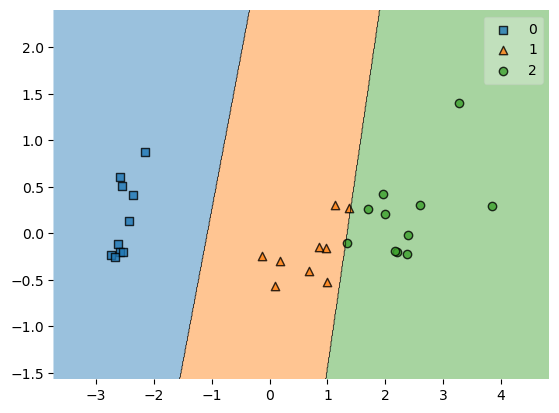

In [33]:
plot_decision_regions(X_test_pca,np.array(y_test),lo)

<Axes: >

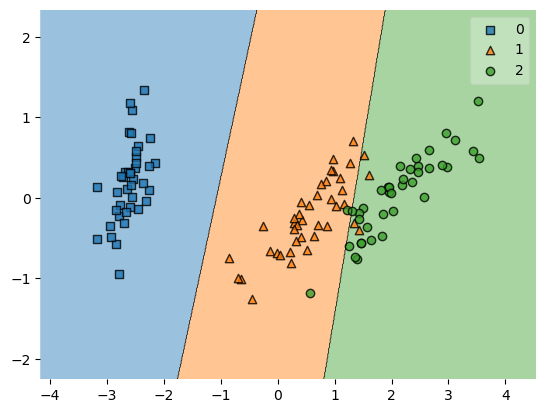

In [34]:
plot_decision_regions(X_train_pca,np.array(y_train),lo)

In [35]:
mlflow.set_experiment('Exp1')
with mlflow.start_run():
    mlflow.log_params(g.best_params_)
    mlflow.log_metric('accuracy',accuracy)
    mlflow.set_tag('Information','Logistic Regression model for Iris Dataset')
    sig=infer_signature(X_train,log_reg.predict(X_train))
    info=mlflow.sklearn.log_model(sk_model=log_reg,artifact_path='Iris Model',signature=sig,input_example=X_train,registered_model_name='Iris Quickstart')    

Registered model 'Iris Quickstart' already exists. Creating a new version of this model...
Created version '3' of model 'Iris Quickstart'.


In [36]:
model=mlflow.pyfunc.load_model(info.model_uri)

In [37]:
model

mlflow.pyfunc.loaded_model:
  artifact_path: Iris Model
  flavor: mlflow.sklearn
  run_id: fee6b97528b64f03abbb5c829ff88783

In [38]:
preds=model.predict(X_test)

In [39]:
data=X_test

In [40]:
data['Actual Label']=y_test
data['Predicted Label']=preds

In [41]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Actual Label,Predicted Label
73,6.1,2.8,4.7,1.2,1,1
18,5.7,3.8,1.7,0.3,0,0
118,7.7,2.6,6.9,2.3,2,2
78,6.0,2.9,4.5,1.5,1,1
76,6.8,2.8,4.8,1.4,1,1
31,5.4,3.4,1.5,0.4,0,0
64,5.6,2.9,3.6,1.3,1,1
141,6.9,3.1,5.1,2.3,2,2
68,6.2,2.2,4.5,1.5,1,1
82,5.8,2.7,3.9,1.2,1,1
